# Milestone 5

## Lincoln Brown

## DSC540

## Professor Williams

In [134]:
import sqlite3 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


## Functions for query building and dataframe cleaning


In [135]:
# Create a function to check the status of the database connection
def check_connection(conn):
    try:
        conn.cursor()
        print("Connection Sucessful")
    except Exception as e:
        print("Connection Failed")
   

In [136]:
# Connect to the database and verify it is connected 
database_file = "DSC540_Project.db"
with sqlite3.connect(database_file) as conn:
    cursor = conn.cursor()
    check_connection(conn)

Connection Sucessful


In [137]:
def reindex_dataframe(dataframe):
    # Create id column from index
    if 'id' not in dataframe.columns:
        dataframe = pd.concat([pd.Series(dataframe.index, index=dataframe.index, name='id'), dataframe], axis=1) 
    return dataframe

In [138]:
def clean_cols(dataframe):
    dataframe.columns = dataframe.columns.str.lower().str.replace(" ", "_").str.replace("#", "_num")  
    for col in dataframe.columns:
        if col.__contains__("unnamed"):
            print(f"Dropped {col}")
            del dataframe[col]
    return dataframe

In [139]:
# Create build_table SQL query string
def build_table(dataframe, table_name):
    # Build query specifically in this function
    dataframe_cols = dataframe.columns
    print(dataframe_cols)
    build_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} (\n"
    for index, col in enumerate(dataframe_cols):
        last_item = len(dataframe_cols) -1
        if col.lower() == 'id':
            build_table_query += f"\tid integer PRIMARY KEY,\n"
        elif index < last_item:
            build_table_query += f"\t{col.lower()} text,\n"
        else:
            build_table_query += f"\t{col.lower()} text\n);"
    return build_table_query

In [140]:
def convert_dtype_str(dataframe):
    convert_dict = {}
    for col in dataframe.columns:
        convert_dict[col] = str
        out_df = dataframe.astype(convert_dict)
    return out_df

In [141]:
def build_insert_query(dataframe, table_name):
    df_cols = dataframe.columns
    col_dict = {}
    for col in df_cols:
        col_dict[col.lower()] = '?'
    insert_query = f"INSERT OR REPLACE INTO {table_name} ({', '.join(map(str,col_dict.keys()))}) values ({', '.join(map(str,col_dict.values()))})"  
    return insert_query

In [142]:
# Drop table if it exists
cursor.execute("DROP TABLE IF EXISTS crime")
cursor.execute("DROP TABLE IF EXISTS phases")
cursor.execute("DROP TABLE IF EXISTS weather")
cursor.execute("DROP TABLE IF EXISTS combined_data")
conn.commit()

## Import Datasets

In [143]:
# Import Datasets
moon_phases_df = pd.read_csv("moon_phases.csv")
weather_df = pd.read_csv("weather_data.csv")
tracked_crime_df = pd.read_csv("tracked_crimes.csv")

In [144]:
# Clean up tracked_crime_dataframe
tracked_crime_df = clean_cols(tracked_crime_df)
tracked_crime_df = reindex_dataframe(tracked_crime_df)
tracked_crime_df

Dropped unnamed:_0


,id,case_num,date_of_occurrence,block,iucr,primary_description,secondary_description,location_description,arrest,domestic,beat,ward,fbi_cd,latitude,longitude,location,date,time,index_code
0,0,JF527842,2022-12-30 17:00:00,031XX W MADISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,N,N,1124,28.0,04A,41.880992,-87.704487,"(41.880992442, -87.704486793)",2022-12-30,17:00:00,I
1,1,JF525890,2022-12-29 03:34:00,010XX S DESPLAINES ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,Y,N,124,25.0,04A,41.869508,-87.643733,"(41.869507545, -87.643733495)",2022-12-29,03:34:00,I
2,2,JF463898,2022-11-05 22:48:00,037XX W 13TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,Y,Y,1011,24.0,04A,41.864423,-87.718820,"(41.864423402, -87.718820002)",2022-11-05,22:48:00,I
3,3,JF511266,2022-12-14 09:27:00,003XX E 134TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,N,N,533,9.0,04A,41.651829,-87.614936,"(41.651828905, -87.61493596)",2022-12-14,09:27:00,I
4,4,JF502368,2022-12-08 06:50:00,011XX N NOBLE ST,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,N,Y,1213,27.0,04A,41.902141,-87.662605,"(41.902141327, -87.662605111)",2022-12-08,06:50:00,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12817,12817,JF411948,2022-09-26 20:40:00,032XX W AUGUSTA BLVD,1010,ARSON,BY EXPLOSIVE,STREET,N,Y,1121,26.0,09,41.899184,-87.707449,"(41.899183745, -87.707448921)",2022-09-26,20:40:00,I
12818,12818,JF502236,2022-12-08 01:49:00,107XX S GREEN ST,1010,ARSON,BY EXPLOSIVE,RESIDENCE,Y,N,2233,34.0,09,41.698709,-87.643796,"(41.698708852, -87.643796318)",2022-12-08,01:49:00,I
12819,12819,JG320056,2023-06-28 19:10:00,062XX N HARLEM AVE,1010,ARSON,BY EXPLOSIVE,ALLEY,N,N,1612,41.0,09,41.994728,-87.806824,"(41.994728475, -87.806823902)",2023-06-28,19:10:00,I
12820,12820,JG121014,2023-01-18 12:00:00,031XX N PAULINA ST,1010,ARSON,BY EXPLOSIVE,RESIDENCE - PORCH / HALLWAY,N,N,1931,32.0,09,41.939007,-87.671073,"(41.939007018, -87.671073125)",2023-01-18,12:00:00,I


In [145]:
# Create a simplified crime dataframe
crime = tracked_crime_df.loc[:,['id','case_num','iucr','primary_description','date']]
crime

,id,case_num,iucr,primary_description,date
0,0,JF527842,051A,ASSAULT,2022-12-30
1,1,JF525890,051A,ASSAULT,2022-12-29
2,2,JF463898,051A,ASSAULT,2022-11-05
3,3,JF511266,051A,ASSAULT,2022-12-14
4,4,JF502368,051A,ASSAULT,2022-12-08
...,...,...,...,...,...
12817,12817,JF411948,1010,ARSON,2022-09-26
12818,12818,JF502236,1010,ARSON,2022-12-08
12819,12819,JG320056,1010,ARSON,2023-06-28
12820,12820,JG121014,1010,ARSON,2023-01-18


In [146]:
# Delete second Timestamp column
if 'Timestamp.1' in moon_phases_df.columns:
    del moon_phases_df['Timestamp.1']

# Add a date column for the join operation
#moon_phases_df['Date'] = pd.to_datetime(moon_phases_df)
moon_phases_df['Date'] = pd.to_datetime(moon_phases_df['Timestamp']).dt.date
moon_phases_df = clean_cols(moon_phases_df)
moon_phases_df = reindex_dataframe(moon_phases_df)
moon_phases_df['date'] = moon_phases_df['date'].astype(pd.StringDtype())

moon_phases_df

,id,timestamp,eclipse_type,moon_type,sun_dist,sun_size,moon_dist,geo,zenith,moon_mag,date
0,0,2022-01-01 23:01:12+00:00,None,Perigee,"147,106,253 km(-1.7%)",0.542°(+1.7%),"358,033 km(-6.4%)",0.556°(+6.6%),0.566°(+6.7%),-13.14(+17.2%),2022-01-01
1,1,2022-01-02 18:33:30+00:00,None,New Moon,"147,105,420 km(-1.7%)",0.542°(+1.7%),"358,676 km(-6.3%)",0.555°(+6.4%),0.565°(+6.5%),-13.14(+16.7%),2022-01-02
2,2,2022-01-14 09:28:37+00:00,None,Apogee,"147,139,169 km(-1.7%)",0.542°(+1.7%),"405,805 km(+6.1%)",0.491°(-6.0%),0.498°(-6.1%),-12.87(-8.8%),2022-01-14
3,3,2022-01-17 23:48:35+00:00,None,Full Moon,"147,171,686 km(-1.6%)",0.542°(+1.7%),"401,023 km(+4.8%)",0.496°(-4.8%),0.504°(-4.9%),-12.89(-6.7%),2022-01-17
4,4,2022-01-30 07:10:17+00:00,None,Perigee,"147,366,481 km(-1.5%)",0.541°(+1.5%),"362,252 km(-5.3%)",0.549°(+5.3%),0.559°(+5.4%),-13.11(+14.0%),2022-01-30
...,...,...,...,...,...,...,...,...,...,...,...
98,98,2023-11-27 09:16:13+00:00,None,Full Moon,"147,622,520 km(-1.3%)",0.540°(+1.3%),"380,478 km(-0.6%)",0.523°(+0.3%),0.532°(+0.3%),-13.00(+3.0%),2023-11-27
99,99,2023-12-04 18:43:43+00:00,None,Apogee,"147,445,833 km(-1.5%)",0.541°(+1.5%),"404,347 km(+5.7%)",0.492°(-5.6%),0.500°(-5.7%),-12.87(-8.6%),2023-12-04
100,100,2023-12-12 23:31:55+00:00,None,New Moon,"147,292,020 km(-1.6%)",0.541°(+1.6%),"375,147 km(-2.0%)",0.531°(+1.7%),0.540°(+1.7%),-13.04(+6.4%),2023-12-12
101,101,2023-12-16 18:54:11+00:00,None,Perigee,"147,232,535 km(-1.6%)",0.542°(+1.6%),"367,901 km(-3.9%)",0.541°(+3.7%),0.550°(+3.8%),-13.08(+10.8%),2023-12-16


In [147]:
# Create a simplified phases dataframe
phases = moon_phases_df.loc[:,['id','eclipse_type','moon_type','date']]
# I have to drop Perigee and Apogee types because they are creating duplicate dates
# Which is causing a cartesian product in my final table
drop_types = ['Perigee','Apogee']
phases = phases.loc[~phases['moon_type'].isin(drop_types),:]
phases = phases.reset_index()
del phases['index']
del phases['id']
phases = clean_cols(phases)
phases = reindex_dataframe(phases)
phases

,id,eclipse_type,moon_type,date
0,0,None,New Moon,2022-01-02
1,1,None,Full Moon,2022-01-17
2,2,None,New Moon,2022-02-01
3,3,None,Full Moon,2022-02-16
4,4,None,New Moon,2022-03-02
5,5,None,Full Moon,2022-03-18
6,6,None,New Moon,2022-04-01
7,7,None,Full Moon,2022-04-16
8,8,Partial Solar Eclipse,New Moon,2022-04-30
9,9,Total Lunar Eclipse,Full Moon,2022-05-16


In [148]:
# Clean up the weather_df
weather_df = clean_cols(weather_df)
weather_df = reindex_dataframe(weather_df)
weather_df

Dropped unnamed:_0


,id,datetime,tempmax_f,tempmin_f,feelslike_f,humidity,conditions,cloudcover,description,visibility,...,preciptype,precip_in,snowdepth_in,moonphase,daylight_hours,solarradiation,precipprob,winddir,sunrise,sunset
0,0,2022-10-01,71.36,55.52,63.44,65.7,Clear,13.8,Clear conditions throughout the day.,15.9,...,NaN,0.000000,NaN,Waxing Crescent,0 days 11:44:41,67.8,0.0,19.2,2022-10-01 06:47:29,2022-10-01 18:32:10
1,1,2022-10-02,69.74,59.66,63.62,69.7,Partially cloudy,36.3,Partly cloudy throughout the day.,16.0,...,NaN,0.000000,NaN,First Quarter,0 days 11:41:54,27.6,0.0,35.7,2022-10-02 06:48:33,2022-10-02 18:30:27
2,2,2022-10-03,70.82,51.74,61.28,57.9,Clear,12.4,Clear conditions throughout the day.,16.0,...,NaN,0.000000,NaN,First Quarter,0 days 11:39:07,61.5,0.0,73.3,2022-10-03 06:49:38,2022-10-03 18:28:45
3,3,2022-10-04,77.30,49.76,62.90,55.5,Partially cloudy,29.4,Partly cloudy throughout the day.,16.0,...,NaN,0.000000,NaN,First Quarter,0 days 11:36:20,40.3,0.0,201.1,2022-10-04 06:50:43,2022-10-04 18:27:03
4,4,2022-10-05,79.46,53.72,67.04,43.2,Partially cloudy,73.7,Partly cloudy throughout the day.,15.9,...,NaN,0.000000,NaN,First Quarter,0 days 11:33:34,64.0,0.0,227.1,2022-10-05 06:51:48,2022-10-05 18:25:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,2023-09-26,76.04,67.58,70.82,81.3,"Rain, Partially cloudy",86.6,Partly cloudy throughout the day with rain.,15.3,...,['rain'],0.318110,NaN,Waxing Gibbous,0 days 11:59:19,18.5,100.0,108.5,2023-09-26 06:41:55,2023-09-26 18:41:14
391,391,2023-09-27,72.62,67.04,69.38,83.4,"Rain, Overcast",96.8,Cloudy skies throughout the day with rain.,14.0,...,['rain'],0.175315,NaN,Waxing Gibbous,0 days 11:56:31,28.2,100.0,105.0,2023-09-27 06:42:59,2023-09-27 18:39:30
392,392,2023-09-28,71.90,67.04,69.20,79.9,"Rain, Partially cloudy",87.2,Partly cloudy throughout the day with rain in ...,15.9,...,['rain'],0.003858,NaN,Waxing Gibbous,0 days 11:53:44,33.1,100.0,53.1,2023-09-28 06:44:02,2023-09-28 18:37:46
393,393,2023-09-29,77.12,61.64,69.02,79.3,Partially cloudy,54.7,Partly cloudy throughout the day.,12.5,...,NaN,0.000000,NaN,Full Moon,0 days 11:50:56,42.1,0.0,116.3,2023-09-29 06:45:06,2023-09-29 18:36:02


In [149]:
# Create a simplified weather dataframe
weather_df.rename(columns = {"datetime": "date"}, inplace=True)
weather = weather_df.loc[:,['id','date','feelslike_f','conditions','moonphase']]
weather

,id,date,feelslike_f,conditions,moonphase
0,0,2022-10-01,63.44,Clear,Waxing Crescent
1,1,2022-10-02,63.62,Partially cloudy,First Quarter
2,2,2022-10-03,61.28,Clear,First Quarter
3,3,2022-10-04,62.90,Partially cloudy,First Quarter
4,4,2022-10-05,67.04,Partially cloudy,First Quarter
...,...,...,...,...,...
390,390,2023-09-26,70.82,"Rain, Partially cloudy",Waxing Gibbous
391,391,2023-09-27,69.38,"Rain, Overcast",Waxing Gibbous
392,392,2023-09-28,69.20,"Rain, Partially cloudy",Waxing Gibbous
393,393,2023-09-29,69.02,Partially cloudy,Full Moon


## Upload Crime Table

In [150]:
crime_table_query = build_table(crime, "crime")
print(crime_table_query)

Index(['id', 'case_num', 'iucr', 'primary_description', 'date'], dtype='object')
CREATE TABLE IF NOT EXISTS crime (
	id integer PRIMARY KEY,
	case_num text,
	iucr text,
	primary_description text,
	date text
);


In [151]:
# Create the crime table
cursor.execute(crime_table_query)
conn.commit()

In [152]:
# Create sql_df to upload to SQL table and build insert query
crime_sql_df = convert_dtype_str(crime)
crime_insert_query = build_insert_query(crime, "crime")
print(crime_insert_query)

INSERT OR REPLACE INTO crime (id, case_num, iucr, primary_description, date) values (?, ?, ?, ?, ?)


In [153]:
# Insert the crime dataframe records into the table
cursor.executemany(crime_insert_query, crime_sql_df.to_records(index=False))
conn.commit()

In [154]:
# Convert it back to pandas dataframe to confirm everything is correct
test_crime_df = pd.read_sql("SELECT * FROM crime", con=conn)
test_crime_df

,id,case_num,iucr,primary_description,date
0,0,JF527842,051A,ASSAULT,2022-12-30
1,1,JF525890,051A,ASSAULT,2022-12-29
2,2,JF463898,051A,ASSAULT,2022-11-05
3,3,JF511266,051A,ASSAULT,2022-12-14
4,4,JF502368,051A,ASSAULT,2022-12-08
...,...,...,...,...,...
12817,12817,JF411948,1010,ARSON,2022-09-26
12818,12818,JF502236,1010,ARSON,2022-12-08
12819,12819,JG320056,1010,ARSON,2023-06-28
12820,12820,JG121014,1010,ARSON,2023-01-18


## Upload Moon phase table

In [155]:
moon_table_query = build_table(phases, "phases")
print(moon_table_query)

Index(['id', 'eclipse_type', 'moon_type', 'date'], dtype='object')
CREATE TABLE IF NOT EXISTS phases (
	id integer PRIMARY KEY,
	eclipse_type text,
	moon_type text,
	date text
);


In [156]:
# Create the phases table
cursor.execute(moon_table_query)
conn.commit()

In [157]:
# Create sql_df to upload to SQL table and build insert query
moon_sql_df = convert_dtype_str(phases)
moon_insert_query = build_insert_query(phases, "phases")
print(moon_insert_query)

INSERT OR REPLACE INTO phases (id, eclipse_type, moon_type, date) values (?, ?, ?, ?)


In [158]:
# Insert the phases dataframe records into the table
cursor.executemany(moon_insert_query, moon_sql_df.to_records(index=False))
conn.commit()

In [159]:
# Convert it back to pandas dataframe to confirm everything is correct
test_moon_df = pd.read_sql("SELECT * FROM phases", con=conn)
test_moon_df

,id,eclipse_type,moon_type,date
0,0,None,New Moon,2022-01-02
1,1,None,Full Moon,2022-01-17
2,2,None,New Moon,2022-02-01
3,3,None,Full Moon,2022-02-16
4,4,None,New Moon,2022-03-02
5,5,None,Full Moon,2022-03-18
6,6,None,New Moon,2022-04-01
7,7,None,Full Moon,2022-04-16
8,8,Partial Solar Eclipse,New Moon,2022-04-30
9,9,Total Lunar Eclipse,Full Moon,2022-05-16


## Upload Weather table

In [160]:
weather_table_query = build_table(weather, "weather")
print(weather_table_query)

Index(['id', 'date', 'feelslike_f', 'conditions', 'moonphase'], dtype='object')
CREATE TABLE IF NOT EXISTS weather (
	id integer PRIMARY KEY,
	date text,
	feelslike_f text,
	conditions text,
	moonphase text
);


In [161]:
# Create the weather table
cursor.execute(weather_table_query)
conn.commit()

In [162]:
# Create sql_df to upload to SQL table and build insert query
weather_sql_df = convert_dtype_str(weather)
weather_insert_query = build_insert_query(weather, "weather")
print(weather_insert_query)

INSERT OR REPLACE INTO weather (id, date, feelslike_f, conditions, moonphase) values (?, ?, ?, ?, ?)


In [163]:
# Insert the phases dataframe records into the table
cursor.executemany(weather_insert_query, weather_sql_df.to_records(index=False))
conn.commit()

In [164]:
# Convert it back to pandas dataframe to confirm everything is correct
test_weather_df = pd.read_sql("SELECT * FROM weather", con=conn)
test_weather_df

,id,date,feelslike_f,conditions,moonphase
0,0,2022-10-01,63.44000000000001,Clear,Waxing Crescent
1,1,2022-10-02,63.62,Partially cloudy,First Quarter
2,2,2022-10-03,61.28,Clear,First Quarter
3,3,2022-10-04,62.9,Partially cloudy,First Quarter
4,4,2022-10-05,67.04,Partially cloudy,First Quarter
...,...,...,...,...,...
390,390,2023-09-26,70.82,"Rain, Partially cloudy",Waxing Gibbous
391,391,2023-09-27,69.38,"Rain, Overcast",Waxing Gibbous
392,392,2023-09-28,69.2,"Rain, Partially cloudy",Waxing Gibbous
393,393,2023-09-29,69.02,Partially cloudy,Full Moon


## Join the tables into one

In [165]:
# Create new table from joined tables
create_join_table = """
CREATE TABLE combined_data 
AS SELECT crime.*, weather.*, phases.*
FROM crime
INNER JOIN weather USING(date)
LEFT JOIN phases USING(date);
"""

In [166]:
# Use the query to create the table and load in the records
combined_table = cursor.execute(create_join_table)

In [167]:
# Verify it was successful 
joined_df = pd.read_sql("SELECT * FROM combined_data", con=conn)
joined_df

,id,case_num,iucr,primary_description,date,id:1,date:1,feelslike_f,conditions,moonphase,id:2,eclipse_type,moon_type,date:2
0,0,JF527842,051A,ASSAULT,2022-12-30,90,2022-12-30,42.2,Overcast,First Quarter,NaN,None,None,None
1,1,JF525890,051A,ASSAULT,2022-12-29,89,2022-12-29,51.92,Partially cloudy,First Quarter,NaN,None,None,None
2,2,JF463898,051A,ASSAULT,2022-11-05,35,2022-11-05,60.38,"Rain, Partially cloudy",Waxing Gibbous,NaN,None,None,None
3,3,JF511266,051A,ASSAULT,2022-12-14,74,2022-12-14,35.72,"Rain, Overcast",Waning Gibbous,NaN,None,None,None
4,4,JF502368,051A,ASSAULT,2022-12-08,68,2022-12-08,34.1,Partially cloudy,Full Moon,23.0,None,Full Moon,2022-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12817,12817,JF411948,1010,ARSON,2022-09-26,360,2022-09-26,60.74,Partially cloudy,New Moon,NaN,None,None,None
12818,12818,JF502236,1010,ARSON,2022-12-08,68,2022-12-08,34.1,Partially cloudy,Full Moon,23.0,None,Full Moon,2022-12-08
12819,12819,JG320056,1010,ARSON,2023-06-28,270,2023-06-28,74.6,Partially cloudy,First Quarter,NaN,None,None,None
12820,12820,JG121014,1010,ARSON,2023-01-18,109,2023-01-18,34.1,"Rain, Overcast",Waning Crescent,NaN,None,None,None


These are some test queries I was working with to get the final product

In [168]:
full_join_query = "SELECT crime.*, weather.*, phases.* FROM crime JOIN weather ON crime.date = weather.date LEFT JOIN phases on crime.date = phases.date;" 
crime_weather_query = "SELECT crime.*, weather.* FROM crime INNER JOIN weather USING(date)"
test_query = "SELECT crime.*, phases.* FROM crime LEFT JOIN phases USING(date);" 
full_join_query

'SELECT crime.*, weather.*, phases.* FROM crime JOIN weather ON crime.date = weather.date LEFT JOIN phases on crime.date = phases.date;'

In [169]:
#crime_weather_result = cursor.execute(crime_weather_query)
combined_result = cursor.execute(full_join_query)

In [170]:
#crime_weather_df = pd.DataFrame(crime_weather_result.fetchall())
combined_df = pd.DataFrame(combined_result.fetchall())

In [171]:
#crime_weather_df
combined_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,JF527842,051A,ASSAULT,2022-12-30,90,2022-12-30,42.2,Overcast,First Quarter,NaN,None,None,None
1,1,JF525890,051A,ASSAULT,2022-12-29,89,2022-12-29,51.92,Partially cloudy,First Quarter,NaN,None,None,None
2,2,JF463898,051A,ASSAULT,2022-11-05,35,2022-11-05,60.38,"Rain, Partially cloudy",Waxing Gibbous,NaN,None,None,None
3,3,JF511266,051A,ASSAULT,2022-12-14,74,2022-12-14,35.72,"Rain, Overcast",Waning Gibbous,NaN,None,None,None
4,4,JF502368,051A,ASSAULT,2022-12-08,68,2022-12-08,34.1,Partially cloudy,Full Moon,23.0,None,Full Moon,2022-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12817,12817,JF411948,1010,ARSON,2022-09-26,360,2022-09-26,60.74,Partially cloudy,New Moon,NaN,None,None,None
12818,12818,JF502236,1010,ARSON,2022-12-08,68,2022-12-08,34.1,Partially cloudy,Full Moon,23.0,None,Full Moon,2022-12-08
12819,12819,JG320056,1010,ARSON,2023-06-28,270,2023-06-28,74.6,Partially cloudy,First Quarter,NaN,None,None,None
12820,12820,JG121014,1010,ARSON,2023-01-18,109,2023-01-18,34.1,"Rain, Overcast",Waning Crescent,NaN,None,None,None


## Final Combined DataFrame

In [172]:
joined_df

,id,case_num,iucr,primary_description,date,id:1,date:1,feelslike_f,conditions,moonphase,id:2,eclipse_type,moon_type,date:2
0,0,JF527842,051A,ASSAULT,2022-12-30,90,2022-12-30,42.2,Overcast,First Quarter,NaN,None,None,None
1,1,JF525890,051A,ASSAULT,2022-12-29,89,2022-12-29,51.92,Partially cloudy,First Quarter,NaN,None,None,None
2,2,JF463898,051A,ASSAULT,2022-11-05,35,2022-11-05,60.38,"Rain, Partially cloudy",Waxing Gibbous,NaN,None,None,None
3,3,JF511266,051A,ASSAULT,2022-12-14,74,2022-12-14,35.72,"Rain, Overcast",Waning Gibbous,NaN,None,None,None
4,4,JF502368,051A,ASSAULT,2022-12-08,68,2022-12-08,34.1,Partially cloudy,Full Moon,23.0,None,Full Moon,2022-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12817,12817,JF411948,1010,ARSON,2022-09-26,360,2022-09-26,60.74,Partially cloudy,New Moon,NaN,None,None,None
12818,12818,JF502236,1010,ARSON,2022-12-08,68,2022-12-08,34.1,Partially cloudy,Full Moon,23.0,None,Full Moon,2022-12-08
12819,12819,JG320056,1010,ARSON,2023-06-28,270,2023-06-28,74.6,Partially cloudy,First Quarter,NaN,None,None,None
12820,12820,JG121014,1010,ARSON,2023-01-18,109,2023-01-18,34.1,"Rain, Overcast",Waning Crescent,NaN,None,None,None


## Visualization 1
Count plot displaying the number of crimes commited per category.
From the plot below, we can see that Assault and Robbery were the most common crimes, followed by Battery. Human trafficking and Offenses involving children have the potential to skew results in other visualizations, so I will likely leave them out.

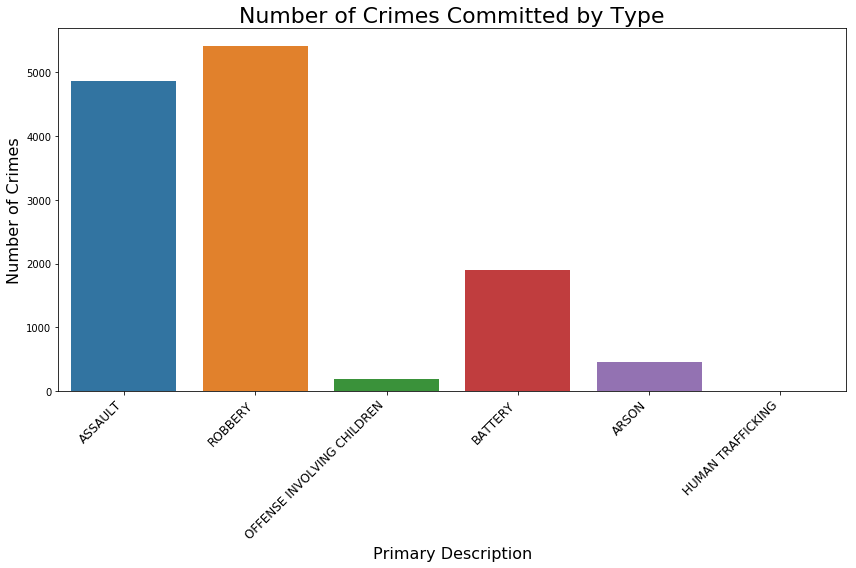

In [173]:
# Plot the number of crimes committed by category
plt.figure(figsize=(12, 8))
sns.countplot(x='primary_description', data=joined_df)
plt.title('Number of Crimes Committed by Type', fontsize=22)
plt.xlabel('Primary Description', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [174]:
# Some prep work for the next visualizations
# Convert the 'date' column to datetime format
joined_df['date'] = pd.to_datetime(joined_df['date'])

# Set the 'date' column as the index
joined_df.set_index('date', inplace=True)

# Use days to resample the dataframe and get the number of crimes commited per day
crimes_over_time = joined_df.resample('D').size()


## Visualization 2
Plot the number of crimes over time.
We can see that the number of crimes fluctuates pretty consistently, until there is a spike in mid-August of 2023. 

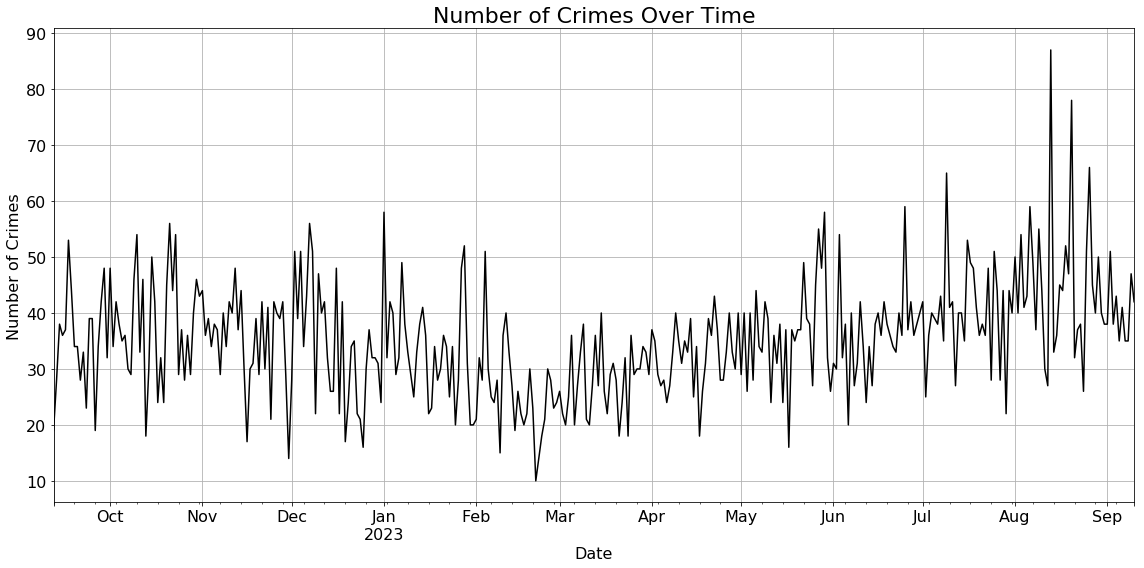

In [175]:
# Create a time series plot
plt.figure(figsize=(16, 8))
crimes_over_time.plot(color='black')
plt.title('Number of Crimes Over Time', fontsize=22)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

## Visualiztion 2.5
Plot the number of crimes over time and include information about eclipses and moon phases.
From this graph, it does not appear that there is heavy correlation between Full Moons and higher incidents of crime, although there are a few spikes associated with Full Moons. I would like to investigate this a little more clearly with a bar plot. 

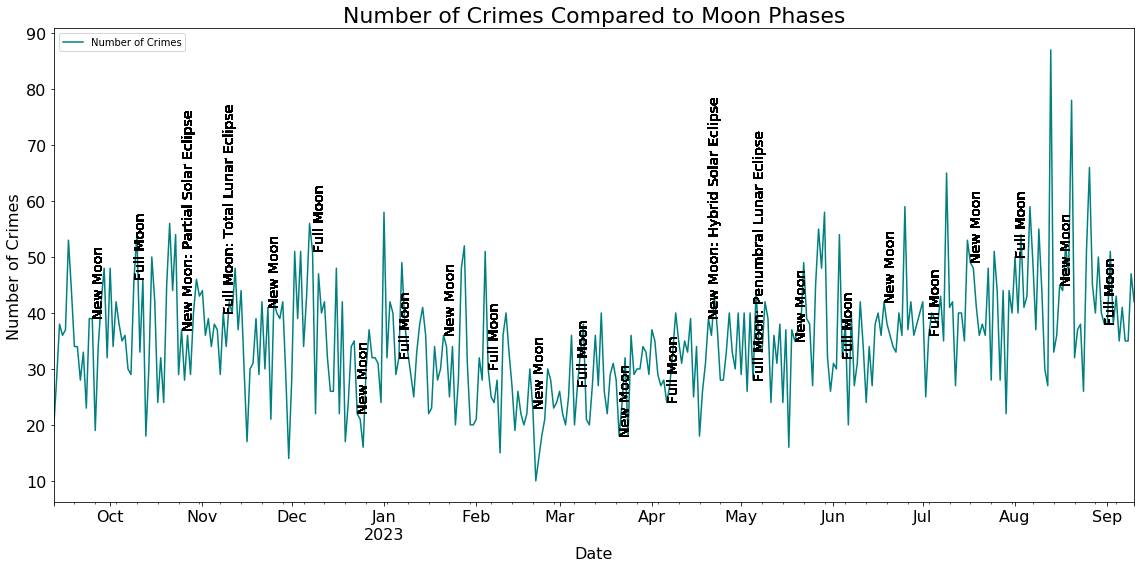

In [176]:
# Create a time series plot
plt.figure(figsize=(16, 8))
crimes_over_time.plot(color='teal', label='Number of Crimes')

# Get the dates and descriptions of the full moons and eclipses
eclipse_dates = joined_df.loc[joined_df['eclipse_type'].notnull(), 'date:2']
eclipse_types = joined_df.loc[joined_df['eclipse_type'].notnull(), 'eclipse_type']
moon_types = joined_df.loc[joined_df['eclipse_type'].notnull(), 'moon_type']
# Annotate the plot with eclipse types
for date, eclipse_type, moon_type in zip(eclipse_dates, eclipse_types, moon_types):
    description = f"{moon_type}"
    if eclipse_type != "None":
        description += f": {eclipse_type}"
    plt.text(date, crimes_over_time[date], description, color='black', 
             rotation=90, verticalalignment='bottom', fontsize=14)

plt.title('Number of Crimes Compared to Moon Phases', fontsize=22)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


## Visualization 3
A bar plot that shows the number of crimes in relation to the moon phase. This is an interesting plot because the most crimes that were reported occurred during the Full Moon. However, the margin is very narrow compared to First Quarter and Waxing Crescent.

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text yticklabel objects>)

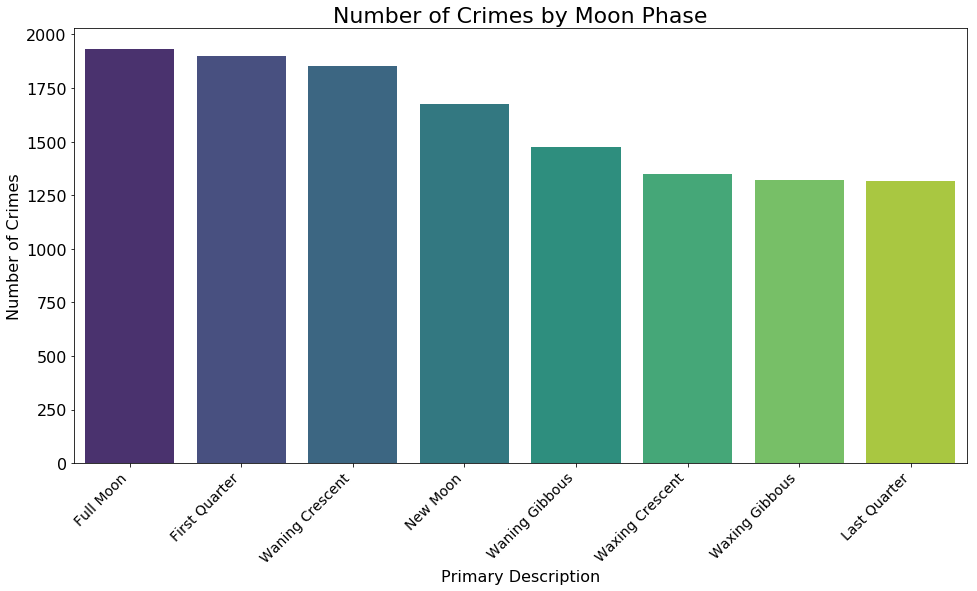

In [177]:
# Create a bar plot of incident counts by moon phase
moonphase_counts = joined_df['moonphase'].value_counts()
plt.figure(figsize=(16,8))
sns.barplot(x=moonphase_counts.index, y=moonphase_counts.values, palette='viridis')
plt.title("Number of Crimes by Moon Phase", fontsize=22)
plt.xlabel("Primary Description", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=16)


Now that we have looked at the moon phases, I would like to examine the relationship between number of crimes committed and the Feels Like temperature.

## Visualization 4
A violin plot that helps to show the distribution of each category of crime and at which temperature they are the most common. From the plot, we can see that between 60 and 80 degrees has the widest area for each violin, indicating the highest number of crimes reported. I would like to see this data a little more clearly represented in a count plot.

I have filtered off the categories that had less than 250 incidents to help prevent skewed interpretations of the plot. 

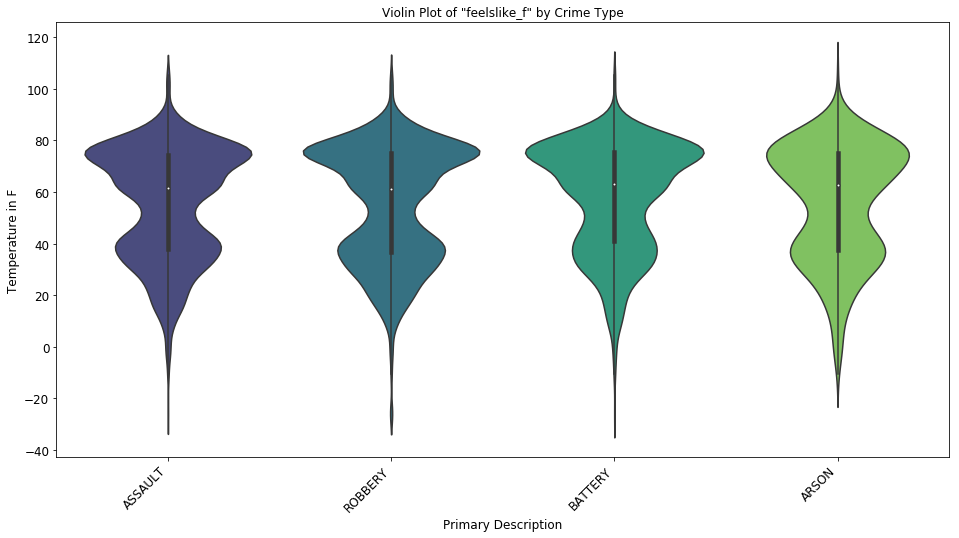

In [182]:
joined_df.loc[:,'feelslike_f'] = joined_df['feelslike_f'].astype(float)
filtered_df = joined_df.copy()
filtered_df = filtered_df[filtered_df['primary_description'].isin(
    filtered_df['primary_description'].value_counts()[filtered_df['primary_description'].value_counts() >= 250].index
)]
plt.figure(figsize=(16,8))
sns.violinplot(x='primary_description', y='feelslike_f', data=filtered_df, palette='viridis')
plt.xlabel('Primary Description', fontsize=12)
plt.ylabel("Temperature in F", fontsize=12)
plt.title('Violin Plot of "feelslike_f" by Crime Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [183]:
# Some prep work for the count plot
temp_min = joined_df['feelslike_f'].min()
temp_max = joined_df['feelslike_f'].max()
# Print the min and max temps
print(f"The min temp is {temp_min}F and the max is {temp_max}F")
# There are only 22 data points below -20, so I am not going to keep the lowest temp
print(len(joined_df.loc[joined_df['feelslike_f'] < -20, 'feelslike_f']))
# Set the number of bins to use
num_bins = 10
# Now create the bins by cutting the series into 10 equal parts
temperature_bins = pd.cut(joined_df['feelslike_f'], bins=num_bins)

# Now add the binned items to a new column
joined_df['temp_range'] = temperature_bins 
# Print the number of crimes in each temperature bin
joined_df['temp_range'].value_counts()

The min temp is -25.84F and the max is 105.2F
22


(65.888, 78.992]      3971
(26.576, 39.68]       2269
(52.784, 65.888]      2042
(39.68, 52.784]       1823
(78.992, 92.096]      1355
(13.472, 26.576]       968
(0.368, 13.472]        223
(-12.736, 0.368]        85
(92.096, 105.2]         64
(-25.971, -12.736]      22
Name: temp_range, dtype: int64

## Visualization 5
A count plot that shows the number of crimes for each temperature range. This is a little clearer than the violin plot. However, the finding is the same, the number of incidents for the temperature range between 65 and 78 is the largest group. 

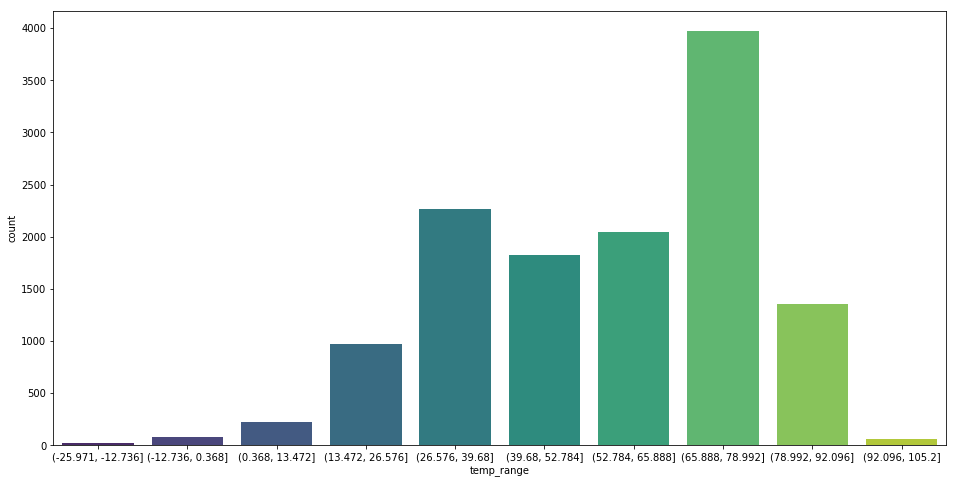

In [184]:
plt.figure(figsize=(16,8))
sns.countplot(x='temp_range', data=joined_df, palette='viridis')

## Ethical Considerations
Having wrapped everything up and actually performing some analysis in this Milestone, I took extra care to be mindful of any potential ethical implications that could come about from manipulation of the data. In particular, I chose to exclude two categories (Human Trafficking and Offenses Involving Children) from some of the visualizations because they were underrepresented samples and I felt as though they could skew the interpretation of the other datapoints. This was particularly a problem with the violin plot because it was not easily understood that they were relatively small compared to the other categories. 

I also would like to take the time to say that all of the crime data was sourced from the City of Chicago's website dedicated to reporting crime:
https://www.chicago.gov/city/en/dataset/crime.html

I chose to work with this dataset because it was publicly available and because I wanted to investigate any potential relationship between reported crime and the Full Moon. I always hear that more crime occurs during a Full Moon and wanted to see how that belief stacked up against reality. On the one hand, the Full Moon phase did have more incidents than other phases of the Moon, but it was a negligible amount. When looking at the data for the past year (which is honestly a rather small dataset in the grand scheme of things) there was not really any clear cut indication that there is any correlation. 

## Summary

This has been a very challenging and rewarding Term Project. I learned a lot about SQL joins and by extension Pandas joins. I used Pandas to join the datasets initially because I find Pandas dataframes easier to work with and visualize how I am doing. I needed that assurance before I worked with SQL joins because they take a little bit more effort to visualize. In the end, I managed to get the datasets joined in both Pandas and SQL. SQL joins are not as challenging as they seem, and it is nice to have a better understanding of their relationship with Pandas joins, merges, and concatenations.  

I had to cut down some of the extra columns from my datasets when performing the joins because my laptop was running out of memory. I have run into this in the past, but I was a little surprised this time around until I realized that I was generating cartesian products that were producing more than 5 million records. Next semester we begin working with Big Data, so I am looking forward to learning how to work efficiently with larger datasets.  

Visualizing the data has always been challenging for me and I was glad to experiment more with it. I learned a lot creating the visualizations for this project and I know that I will be returning to these visualizations as examples in the future. My favorite visualization from this semester was the candy dataset. I worked hard to get a similar visualization to the one that is on the Boing Boing website. In this project, I think my favorite visualization is the violin plot. I also liked Visualization 2.5 time series plot that includes the moon phases as text labels on the plot.  

I enjoyed the term project more than the regular assignments, but the regular assignments were challenging in their own way and sometimes it helps to have guided learning. Without the assignments I would not have had as much opportunity to clean datasets, because the data I worked with for my term project was relatively clean already. I found that I enjoy the wrangling side of things and get a certain satisfaction from automating tasks that can feel redundant. I spent a lot of time during this project creating functions to clean the datasets and get them ready for placement in the SQL database.  

Overall, I really enjoyed this class and the books that we read. I am looking forward to next semester and getting better at working with large datasets. A skill I apparently am in need of. 

 